In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.set_option('precision', 4)
fig_path = '/home/arthur/Documents/Doutorado/papers/rec/umuai'

In [11]:
dataset = 'nowplaying'
slugs_df = pd.read_csv('slugs.csv', sep=';').set_index('Metrics')
folder='/home/arthur/Documents/Doutorado/exp/recommendation/ludewig/results/ir/next/%s/' % dataset
files= ['test_window_next_knn_%s.%s.csv', 'test_window_next_knn2_%s.%s.csv', 'test_window_next_rules_%s.%s.csv', 'test_window_next_neural_%s.%s.csv']
#files= ['test_window_next_knn_%s.%s.csv']
num_slices = 3
dfx = None
df = None
for j, file in enumerate(files):
    for slice_num in range(num_slices):
        filename = os.path.join(folder, file % (dataset, slice_num))
        if slice_num == 0 and j == 0:
            df = pd.read_csv(filename, sep=';')
        else:
            dfx = pd.read_csv(filename, sep=';')[:]
            df = df.append(dfx)
metr = df.Metrics.values
df = df.groupby(['Metrics']).mean()
df = df.reset_index()
df.set_index('Metrics', inplace=True)

df.insert(0, 'metrics', slugs_df['slug'])
df = df[df.metrics != 'skip']
df.reset_index(drop=True, inplace=True)

xdf = df[['metrics', 'HitRate@1: ', 'HitRate@20: ', 'MRR@1: ', 'MRR@20: ']].sort_values('MRR@1: ', ascending=False)
xdf.style.background_gradient(axis = 0, cmap='Blues')

,metrics,HitRate@1:,HitRate@20:,MRR@1:,MRR@20:
2,IR-MC,0.0883,0.1550,0.0883,0.1065
7,SR,0.0758,0.1983,0.0758,0.1045
5,MC,0.0751,0.1536,0.0751,0.0964
1,GRU4Rec,0.0716,0.1831,0.0716,0.0968
9,STAN,0.0374,0.2306,0.0374,0.0822
0,AR,0.0354,0.2005,0.0354,0.0678
10,VSKNN,0.0348,0.2445,0.0348,0.0752
4,IR-TFIDF-a,0.0344,0.1829,0.0344,0.0653
8,STAN2,0.0344,0.2547,0.0344,0.0765
3,IR-TFIDF-b,0.0316,0.0830,0.0316,0.0518


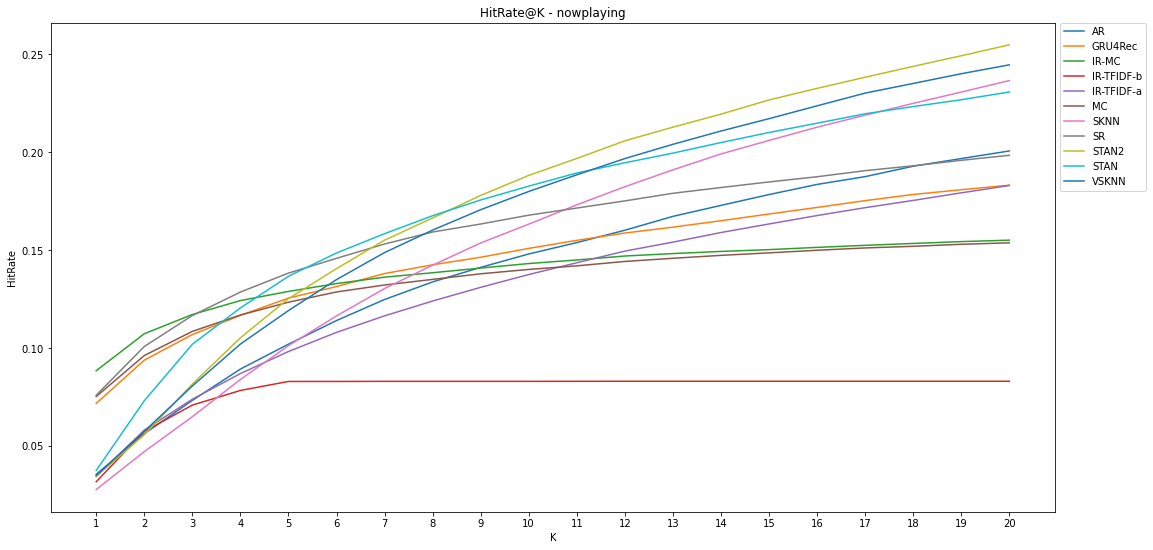

In [12]:
cl = ['HitRate@%s: ' % x for x in range(1, 21)]
df_hr = df[['metrics'] + cl].T
new_header = df_hr.iloc[0] 
df_hr = df_hr[1:]
df_hr.columns = new_header 
blacklist = ['ir_mc-past_items=1', 'ir_mc-past_items=2', 'ir_mc-past_items=3', 'ir_mc-past_items=5', 'ir_mc-past_items=6']

plt.figure(figsize=(18, 9))
for col in [c for c in df_hr.columns if c not in blacklist]:
    plt.plot(df_hr[col], label=col)
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0.)
plt.xticks(range(20), range(1, 21))
plt.xlabel('K')
plt.ylabel('HitRate')
plt.title("HitRate@K - %s" % dataset)
plt.savefig(os.path.join(fig_path, '%s_hit_rate.pdf' % dataset), format='pdf')
plt.show()

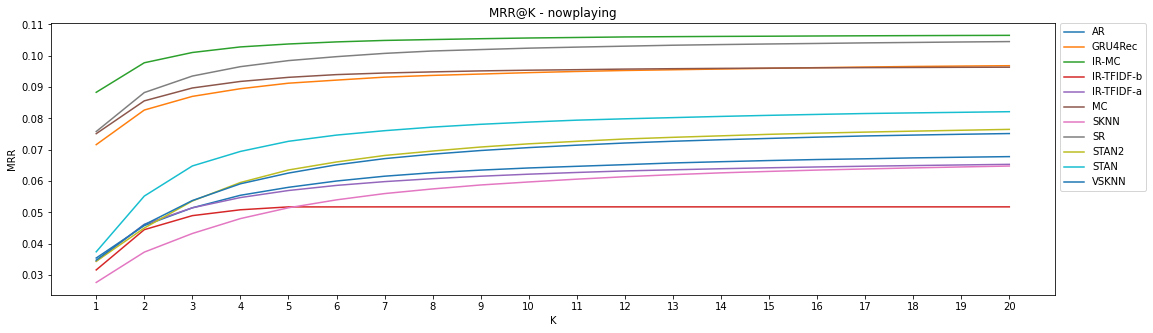

In [13]:
cl = ['MRR@%s: ' % x for x in range(1, 21)]
df_mrr = df[['metrics'] + cl].T
#df_mrr = df[interv].T
new_header = df_mrr.iloc[0] 
df_mrr = df_mrr[1:]
df_mrr.columns = new_header 

plt.figure(figsize=(18, 5))
for col in [c for c in df_mrr.columns if c not in blacklist]:
    plt.plot(df_mrr[col], label=col)
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0.)
plt.xticks(range(20), range(1, 21))
plt.xlabel('K')
plt.ylabel('MRR')
plt.title("MRR@K - %s" % dataset)
plt.savefig(os.path.join(fig_path, '%s_mrr.pdf' % dataset), format='pdf')
plt.show()

In [14]:
txt = xdf.to_latex(col_space=1, index=False)
open('/home/arthur/Documents/Doutorado/papers/rec/umuai/tbl_%s.tex' % dataset, 'w').write(txt)
xdf

,metrics,HitRate@1:,HitRate@20:,MRR@1:,MRR@20:
2,IR-MC,0.0883,0.1550,0.0883,0.1065
7,SR,0.0758,0.1983,0.0758,0.1045
5,MC,0.0751,0.1536,0.0751,0.0964
1,GRU4Rec,0.0716,0.1831,0.0716,0.0968
9,STAN,0.0374,0.2306,0.0374,0.0822
0,AR,0.0354,0.2005,0.0354,0.0678
10,VSKNN,0.0348,0.2445,0.0348,0.0752
4,IR-TFIDF-a,0.0344,0.1829,0.0344,0.0653
8,STAN2,0.0344,0.2547,0.0344,0.0765
3,IR-TFIDF-b,0.0316,0.0830,0.0316,0.0518
